In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.decomposition import PCA

In [5]:
# Select features(exclude Target 'Class')
X=df.drop('Class',axis=1)
y=df['Class']

In [6]:
# Standardize the features
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [7]:
# Apply PCA
# Lets reduce to 2 components for visualization
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)

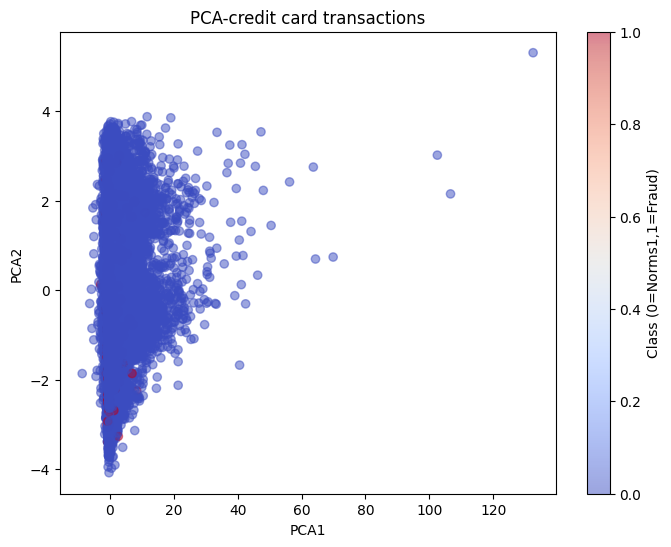

In [8]:
import matplotlib.pyplot as plt
# Plot the pca components
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0],X_pca[:,1],c=y,cmap='coolwarm',alpha=0.5)
plt.title('PCA-credit card transactions')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label='Class (0=Norms1,1=Fraud)')
plt.show()

In [9]:
X_pca

array([[ 0.41663045, -2.53266428],
       [-0.39345348, -2.0773255 ],
       [ 1.86852545, -2.53349699],
       ...,
       [-0.19406338,  2.07078798],
       [-0.46608925,  1.22539363],
       [ 0.76759651,  1.90590292]], shape=(284807, 2))

In [10]:
#
from sklearn.ensemble import IsolationForest

In [11]:
iso=IsolationForest(contamination=0.001)
y_pred=iso.fit_predict(X_scaled)

In [12]:
df['anomaly']=y_pred

In [13]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,anomaly
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,1
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,1
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,1
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,1
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,1
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,1


In [14]:
1 and -1

-1

In [15]:
df['anomaly'].value_counts()

anomaly
 1    284522
-1       285
Name: count, dtype: int64

In [16]:
df[df['anomaly']==-1]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,anomaly
1632,1264.0,-11.140706,-9.612726,-12.389545,6.013346,-32.092129,21.393069,34.303177,-7.520784,-1.925732,...,1.366110,-2.925888,0.843551,0.746267,0.801387,3.852046,4.157934,7712.43,0,-1
6812,8592.0,-23.066842,-25.640527,-3.080313,4.866932,6.901397,-4.074335,2.027345,-2.688652,3.402966,...,3.312971,13.876221,-0.572177,5.525093,0.906980,3.358822,3.553906,845.73,0,-1
6971,9064.0,-3.499108,0.258555,-4.489558,4.853894,-6.974522,3.628382,5.431271,-1.946734,-0.775680,...,0.204817,-2.119007,0.170279,-0.393844,0.296367,1.985913,-0.900452,1809.68,1,-1
8335,11131.0,-1.426623,4.141986,-9.804103,6.666273,-4.749527,-2.073129,-10.089931,2.791345,-3.249516,...,0.407809,0.605809,-0.769348,-1.746337,0.502040,1.977258,0.711607,1.00,1,-1
8610,11621.0,-27.670569,-34.607649,2.243079,10.463020,34.099309,-23.496714,-26.548144,-0.779134,7.496577,...,-1.627883,-11.669994,2.192626,-2.483069,1.788189,8.254376,-3.509250,55.25,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271810,164759.0,-15.622687,-13.011941,-8.330979,8.860364,-8.640796,4.839857,6.164138,-0.595616,-1.179146,...,-1.125043,-8.102468,1.138071,-1.738299,0.326575,3.276514,-3.250235,1875.48,0,-1
271853,164783.0,-18.479164,-15.726967,-9.410119,9.739257,-7.635013,3.553671,4.550106,0.008685,-0.946745,...,-1.706726,-10.117548,1.250139,-2.141659,0.173716,2.670597,-3.095313,1350.90,0,-1
274771,166198.0,-35.548539,-31.850484,-48.325589,15.304184,-113.743307,73.301626,120.589494,-27.347360,-3.872425,...,5.712303,-1.581098,4.584549,4.554683,3.415636,31.612198,-15.430084,25691.16,0,-1
279610,168987.0,-25.672101,-30.913347,-2.943712,5.330375,11.886791,-8.036176,-1.273707,-1.444300,2.047691,...,2.097348,20.803344,0.290511,5.826159,0.578662,6.987314,-3.666456,998.19,0,-1
